### Gradientenverfahren

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import math

/var/folders/vx/hcm3xqr533g30kd_72jn3qb40000gn/T/ipykernel_21446/309269480.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


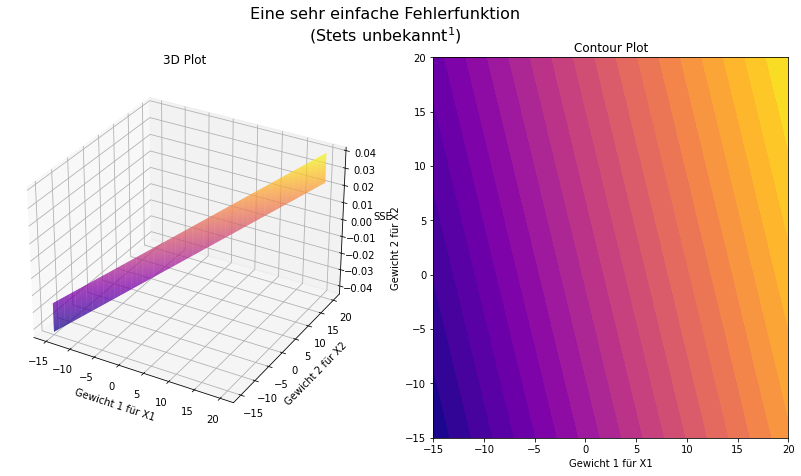

In [8]:
# Beispiel unterschiedliche Fehlerfunktionen

def mse(x,w,y):
    return np.mean((np.dot(x,w).reshape(-1,1)-y)**2)

def mae(x,w,y):
    return np.mean(np.dot(x,w).reshape(-1,1)-y)

def rmse(x,w,y):
    return math.sqrt(np.mean((np.dot(x,w).reshape(-1,1)-y)**2))


x = np.random.uniform(-1,1,(1000,2))
y = np.sum(x*2.5,axis=1).reshape(-1,1)
y += 0.4*np.random.uniform(-1,1,(1000,1))
w_real = np.array([2.5,2.5]).reshape(-1,1)
w_random = np.array([-10,15]).reshape(-1,1)

error_surface = []
# Die Grenzen der Gewichte definieren
w1_space, w2_space = np.linspace(-15,20), np.linspace(-15,20)

# jede Gewichtskombination durchlaufen
for w2 in w2_space:
    for w1 in w1_space:
        # den sse für diese Werte speichern
        error_surface.append(mae(x,np.array([w1,w2]),y))
    
# die Oberfläche zu einem Quadrat Formen
error_surface = np.array(error_surface).reshape(50,50)

# Plot initialisieren
fig = plt.figure(figsize=(14,7))
fig.suptitle("Eine sehr einfache Fehlerfunktion\n(Stets unbekannt$^1$)", fontsize=16)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# 3 dimensionale Ansicht darstellen
ax1.plot_surface(w1_space,w2_space,error_surface, cmap=cm.plasma)
## Plot beschreiben
ax1.set_xlabel("Gewicht 1 für X1")
ax1.set_ylabel("Gewicht 2 für X2")
ax1.set_zlabel("SSE")
ax1.set_title("3D Plot")

# Contour Plot
ax2.contourf(w1_space,w2_space,error_surface, cmap=cm.plasma,levels=20)
## Globales Minimum einfügen

## Plot beschreiben
ax2.set_xlabel("Gewicht 1 für X1")
ax2.set_ylabel("Gewicht 2 für X2")
ax2.set_title("Contour Plot")

fig.show()

